In [21]:
import pandas as pd 
import datetime as d
import sqlalchemy as sql 
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 
import random
%matplotlib inline


In [22]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210703,210710,210717,210724,210731,210807,210814,210821,210828,210904,210911,210918,210925]

turnstiles_df= get_data(week_nums)
turnstiles_df.to_csv('MTA_DATA.csv',index=False)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646


In [23]:
pwd

'C:\\Users\\New'

In [24]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [25]:
turnstiles_df.info

<bound method DataFrame.info of           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
1        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
2        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
3        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
4        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
...       ...   ...       ...            ...      ...      ...         ...   
210395  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210396  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210397  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210398  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210399  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   

            TIME     DESC  ENTR

In [26]:
turnstiles_df.shape

(2724418, 11)

In [27]:
turnstiles_df.STATION.value_counts()

34 ST-PENN STA     55390
FULTON ST          52351
GRD CNTRL-42 ST    49709
23 ST              39859
86 ST              35421
                   ...  
SHEPHERD AV         1625
KOSCIUSZKO ST       1623
PRESIDENT ST        1622
SUTTER AV           1092
CLEVELAND ST        1090
Name: STATION, Length: 379, dtype: int64

# Read the file from SQL :

In [8]:
engine = create_engine("sqlite:///MTA_DATA.db")

# Strip 

In [32]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [33]:
turnstiles_df.columns= [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

# How many Stations in dataset 

In [31]:
turnstiles_df.STATION.value_counts()

34 ST-PENN STA     55390
FULTON ST          52351
GRD CNTRL-42 ST    49709
23 ST              39859
86 ST              35421
                   ...  
SHEPHERD AV         1625
KOSCIUSZKO ST       1623
PRESIDENT ST        1622
SUTTER AV           1092
CLEVELAND ST        1090
Name: STATION, Length: 379, dtype: int64

# Find and droped the null value 

In [30]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


Null 

In [29]:
turnstiles_df.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

Drop the null

In [34]:
turnstiles_df2=turnstiles_df.dropna()
turnstiles_df2.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729


# Sort the values

In [36]:
turnstiles_df2.DATE.value_counts().sort_index()

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 91, dtype: int64

# New column that combain the Date and Time columns 

In [37]:
turnstiles_df2["DATE_TIME"] = pd.to_datetime(turnstiles_df2.DATE + " " +turnstiles_df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [38]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00


# Drop Duplicates 

In [40]:
(turnstiles_df2
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,ENTRIES
4681,R533,R055,00-00-03,FLUSHING-MAIN,641
4691,R533,R055,00-03-05,FLUSHING-MAIN,641
4678,R533,R055,00-00-00,FLUSHING-MAIN,641
4679,R533,R055,00-00-01,FLUSHING-MAIN,641
4680,R533,R055,00-00-02,FLUSHING-MAIN,641
4682,R533,R055,00-00-04,FLUSHING-MAIN,641
4683,R533,R055,00-00-05,FLUSHING-MAIN,641
4684,R533,R055,00-00-06,FLUSHING-MAIN,641
4685,R533,R055,00-00-07,FLUSHING-MAIN,641
4687,R533,R055,00-03-01,FLUSHING-MAIN,641


In [42]:
turnstiles_df2.shape

(2724418, 12)

In [43]:
mask = (turnstiles_df2.duplicated(subset =['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'], keep ='first'))
turnstiles_df2[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
188380,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
188382,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
188386,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00
188388,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00
190326,R523,R147,00-00-07,61 ST WOODSIDE,7,IRT,08/18/2021,05:00:00,RECOVR AUD,22112575,4491111,2021-08-18 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
208717,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,00:00:00,RECOVR AUD,1215249,140,2021-09-19 00:00:00
208720,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,08:00:00,RECOVR AUD,1215256,140,2021-09-19 08:00:00
208722,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,12:00:00,RECOVR AUD,1215274,140,2021-09-19 12:00:00
208724,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,16:00:00,RECOVR AUD,1215287,140,2021-09-19 16:00:00


In [45]:
turnstiles_df3=turnstiles_df2[turnstiles_df2['DESC']=='REGULAR']

In [46]:
turnstiles_df3.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [47]:
turnstiles_df3.sample(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
154332,R206,R014,02-00-00,FULTON ST,2345ACJZ,IRT,07/08/2021,21:00:00,REGULAR,2209547,5348712,2021-07-08 21:00:00
118755,PTH02,R544,00-06-00,HARRISON,1,PTH,07/16/2021,18:25:57,REGULAR,239,11580,2021-07-16 18:25:57


In [48]:
(turnstiles_df3
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,ENTRIES
4680,R533,R055,00-00-03,FLUSHING-MAIN,612
4681,R533,R055,00-00-04,FLUSHING-MAIN,612
4686,R533,R055,00-03-01,FLUSHING-MAIN,612
4683,R533,R055,00-00-06,FLUSHING-MAIN,612
4677,R533,R055,00-00-00,FLUSHING-MAIN,612


# Drop the Unused Columns

In [ ]:
#turnstiles_df3(["LINENAME","DIVISION","DESC"], axis=1, errors="ignore",inplace=True)


In [ ]:
turnstiles_df3.head()

# Create a new DataFrame

In [49]:
turnstiles_daily=(turnstiles_df3.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","DATE_TIME","EXITS"],as_index=False)
                        .ENTRIES.first()
               )

In [50]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES
0,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 00:00:00,2595706,7592792
1,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 04:00:00,2595713,7592804
2,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 08:00:00,2595729,7592816
3,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 12:00:00,2595762,7592870
4,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 16:00:00,2595791,7592992


# Create A new Column Name is TIME_INTERVAL 

In [54]:
turnstiles_daily["TIME_INTERVAL"] = (
         np.where(
             (turnstiles_daily.DATE_TIME.dt.hour <= 8), "Morning"
                 ,np.where(
                     (turnstiles_daily.DATE_TIME.dt.hour <= 16), "After Noon"
                         ,"Evening")))

In [55]:
turnstiles_daily[["PREV_DATE","PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])["DATE","ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-55-846d0ee891b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE","PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])["DATE","ENTRIES","EXITS"]


In [59]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 00:00:00,2595706,7592792,Morning,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 04:00:00,2595713,7592804,Morning,06/26/2021,7592792.0,2595706.0
2,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 08:00:00,2595729,7592816,Morning,06/26/2021,7592804.0,2595713.0
3,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 12:00:00,2595762,7592870,After Noon,NaN,NaN,NaN
4,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 16:00:00,2595791,7592992,After Noon,06/26/2021,7592870.0,2595762.0


In [61]:
turnstiles_daily.shape

(2710251, 12)

In [62]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [63]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 04:00:00,2595713,7592804,Morning,06/26/2021,7592792.0,2595706.0
2,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 08:00:00,2595729,7592816,Morning,06/26/2021,7592804.0,2595713.0
4,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 16:00:00,2595791,7592992,After Noon,06/26/2021,7592870.0,2595762.0
6,A002,R051,02-00-00,59 ST,06/27/2021,2021-06-27 00:00:00,2595818,7593175,Morning,06/26/2021,7592816.0,2595729.0
7,A002,R051,02-00-00,59 ST,06/27/2021,2021-06-27 04:00:00,2595820,7593182,Morning,06/27/2021,7593175.0,2595818.0


In [64]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] <turnstiles_daily["PREV_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A   UNIT  SCP       STATION          TIME_INTERVAL
A011  R080  01-03-00  57 ST-7 AV       After Noon       180
                                       Evening           89
                                       Morning          271
A013  R081  01-06-01  49 ST            After Noon         1
                                       Evening            1
                                                       ... 
R730  R431  00-00-04  EASTCHSTER/DYRE  Evening          178
                                       Morning          138
S101  R070  00-00-02  ST. GEORGE       After Noon         3
                                       Evening            3
                                       Morning            5
Length: 612, dtype: int64

In [66]:
turnstiles_daily[turnstiles_daily["ENTRIES"] <turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS
21141,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 04:00:00,489554428,885595259,Morning,06/26/2021,885595278.0,489554461.0
21142,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 08:00:00,489554377,885595248,Morning,06/26/2021,885595259.0,489554428.0
21144,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 16:00:00,489553922,885595182,After Noon,06/26/2021,885595226.0,489554197.0
21146,A011,R080,01-03-00,57 ST-7 AV,06/27/2021,2021-06-27 00:00:00,489553612,885595052,Morning,06/26/2021,885595248.0,489554377.0
21147,A011,R080,01-03-00,57 ST-7 AV,06/27/2021,2021-06-27 08:00:00,489553540,885595023,Morning,06/27/2021,885595052.0,489553612.0


In [65]:
(turnstiles_daily[turnstiles_daily["EXITS"] <turnstiles_daily["PREV_EXITS"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A   UNIT  SCP       STATION      TIME_INTERVAL
A011  R080  01-03-00  57 ST-7 AV   After Noon       180
                                   Evening           89
                                   Morning          271
A013  R081  01-06-01  49 ST        After Noon         1
                                   Evening            1
                                                   ... 
R728  R226  00-05-01  GUN HILL RD  Evening            1
                                   Morning            1
S101  R070  00-00-02  ST. GEORGE   After Noon         3
                                   Evening            3
                                   Morning            5
Length: 556, dtype: int64

In [68]:
turnstiles_daily[turnstiles_daily["EXITS"] <turnstiles_daily["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS
21141,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 04:00:00,489554428,885595259,Morning,06/26/2021,885595278.0,489554461.0
21142,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 08:00:00,489554377,885595248,Morning,06/26/2021,885595259.0,489554428.0
21144,A011,R080,01-03-00,57 ST-7 AV,06/26/2021,2021-06-26 16:00:00,489553922,885595182,After Noon,06/26/2021,885595226.0,489554197.0
21146,A011,R080,01-03-00,57 ST-7 AV,06/27/2021,2021-06-27 00:00:00,489553612,885595052,Morning,06/26/2021,885595248.0,489554377.0
21147,A011,R080,01-03-00,57 ST-7 AV,06/27/2021,2021-06-27 08:00:00,489553540,885595023,Morning,06/27/2021,885595052.0,489553612.0


# Remove the outliers 

In [70]:
def get_daily_counts(row, max_counter):
    counter =abs(row["ENTRIES"] - row["PREV_ENTRIES"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_daily["DAILY_ENTRIES"] =turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

393216 1.0
393216 1.0
393216 1.0
5 150038.0
72 150038.0
298 150038.0
193 8049600.0
393 8049630.0
545 8049271.0
10 468608.0
12 468610.0
17 468616.0
167790067 702247.0
167790157 702266.0
167790175 702272.0
151 5602299.0
310 5601538.0
370 5601956.0
149 132517.0
351 131722.0
442 132203.0
98 9762012.0
763 9762328.0
1736 9761621.0
33565227 188201.0
33565264 188178.0
33565264 188198.0
12 8723968.0
1155 8723932.0
1378 8724126.0
458766 2577.0
458768 2578.0
458768 2577.0
6 106396.0
48 106396.0
66 106396.0
164 149712.0
313 150037.0
765 150473.0
393216 728.0
393216 728.0
393216 728.0
66 3272795.0
247 3272536.0
511 3272713.0
64 124319.0
185 124227.0
324 124243.0
67 1605140.0
200 1605042.0
5671 4298891.0
5946 4298704.0
6006 4298784.0
0 117440512.0
0 117440512.0
0 117440512.0
83 366981.0
265 367097.0
355 367163.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
10 500619.0
251 500527.0
350 500547.0
327820 7576712.0
327975 7577027.0
328039 7577112.0
26 490306.0
85 490316.0
98 4902

In [72]:
def get_daily_counts(row, max_counter):
    counter =abs(row["EXITS"] - row["PREV_EXITS"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_daily["DAILY_EXITS"] =turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

63 2357375.0
195 2357391.0
208 2357186.0
124 689390.0
1010 689571.0
1170 689992.0
268473354 1082770.0
268473848 1083083.0
268474006 1083236.0
187 2239687.0
633 2239324.0
813 2239554.0
12 1076138.0
26 1076153.0
91 1076117.0
100678103 413088.0
100678311 411916.0
100678311 412511.0
7 8512736.0
1361 8512663.0
1698 8512839.0
7 1025567.0
330 1025424.0
708 1025493.0
50 204947.0
145 205254.0
433 205674.0
12 273701.0
163 273924.0
487 274285.0
146 2544401.0
356 2543879.0
713 2544156.0
23 161084.0
180 161084.0
422 161084.0
164 152516.0
1145 151877.0
1345 152192.0
42 561847.0
114 561792.0
3844 494213.0
3870 494138.0
3887 494167.0
306 1150397.0
597 1150695.0
1235 1151342.0
14484466 852978.0
852992 14484466.0
15894763 166120.0
166125 15894763.0
2133796536 55608.0
55645 2133796536.0
2 477315.0
136 477096.0
237 477147.0
62 2004621.0
106 2004675.0
128 2004698.0
13 319235.0
168 319261.0
214 319198.0
7 1502329.0
79 1502382.0
106 1502424.0
50 1851686.0
132 1851828.0
271 1852012.0
4 705468321.0
274 7054684

In [74]:
turnstiles_daily.sort_values("DAILY_ENTRIES", ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1672771,PTH22,R540,00-02-03,PATH NEW WTC,08/19/2021,2021-08-19 13:30:29,76,37,After Noon,08/19/2021,99614.0,90854.0,99577.0,90778.0
1672772,PTH22,R540,00-02-03,PATH NEW WTC,08/19/2021,2021-08-19 17:42:29,144,318,Evening,08/18/2021,99609.0,90519.0,99291.0,90375.0
1672774,PTH22,R540,00-02-03,PATH NEW WTC,08/20/2021,2021-08-20 02:06:29,221,570,Morning,08/19/2021,99612.0,90549.0,99042.0,90328.0
2270691,R310,R053,01-00-01,3 AV-149 ST,09/06/2021,2021-09-06 20:00:00,5034,97657,Evening,09/05/2021,771.0,287.0,96886.0,4747.0
2270692,R310,R053,01-00-01,3 AV-149 ST,09/07/2021,2021-09-07 00:00:00,5092,97712,Morning,09/06/2021,928.0,364.0,96784.0,4728.0


# The aggregation 

In [76]:
turnstiles_daily['STATION'].value_counts()

34 ST-PENN STA     54764
FULTON ST          52013
GRD CNTRL-42 ST    49332
23 ST              39429
86 ST              35088
                   ...  
PRESIDENT ST        1604
MORRIS PARK         1600
AVENUE X            1575
CLEVELAND ST        1084
SUTTER AV           1080
Name: STATION, Length: 379, dtype: int64

# ENTRIES

In [77]:
tENt_daily= \
(turnstiles_daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_ENTRIES']].sum().reset_index())
tENt_daily.head()

,STATION,TIME_INTERVAL,DAILY_ENTRIES
0,1 AV,After Noon,683597.0
1,1 AV,Evening,683190.0
2,1 AV,Morning,680660.0
3,103 ST,After Noon,956102.0
4,103 ST,Evening,959990.0


In [188]:
tENt_daily2= (
   tENt_daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_ENTRIES']].max()
                .sort_values('DAILY_ENTRIES', ascending=False)
                 .reset_index())
tENt_daily2

,STATION,TIME_INTERVAL,DAILY_ENTRIES
0,34 ST-PENN STA,After Noon,4104845.0
1,34 ST-PENN STA,Evening,4103583.0
2,34 ST-PENN STA,Morning,4088139.0
3,34 ST-HERALD SQ,After Noon,3080199.0
4,34 ST-HERALD SQ,Evening,3079289.0
...,...,...,...
1132,BROAD CHANNEL,After Noon,10445.0
1133,BROAD CHANNEL,Morning,10365.0
1134,ORCHARD BEACH,After Noon,569.0
1135,ORCHARD BEACH,Evening,569.0


Entries - Evening > Commerical Area

In [245]:
Most_evening_ENT=tENt_daily2[tENt_daily2['TIME_INTERVAL'] == 'Evening'][['STATION','DAILY_ENTRIES']]
Most_evening_ENT

,STATION,DAILY_ENTRIES
1,34 ST-PENN STA,4103583.0
4,34 ST-HERALD SQ,3079289.0
6,GRD CNTRL-42 ST,2880513.0
10,42 ST-PORT AUTH,2779877.0
12,23 ST,2635538.0
...,...,...
1124,BEACH 44 ST,26090.0
1125,BEACH 98 ST,20575.0
1128,BEACH 105 ST,13247.0
1131,BROAD CHANNEL,10454.0


Text(0.5, 1.0, 'The highest stations are crowded when entering in the evening ')

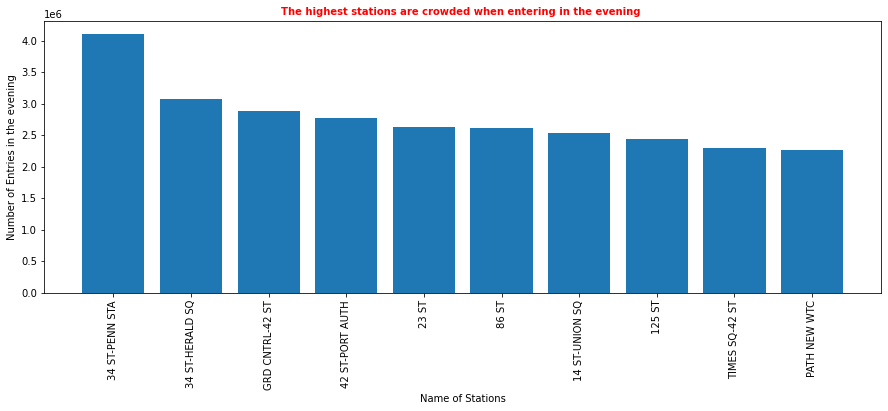

In [294]:
plt.figure(figsize=(15,5))
plt.bar(x=Most_evening_ENT['STATION'][:10], height=Most_evening_ENT['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Entries in the evening')
plt.xlabel('Name of Stations')
plt.title('The highest stations are crowded when entering in the evening ', color='r',size=10, weight="bold")

Entries - Morning > Commercial Area

In [248]:
Most_morning_ENT=tENt_daily2[tENt_daily2['TIME_INTERVAL'] == 'Morning'][['STATION','DAILY_ENTRIES']]
Most_morning_ENT

,STATION,DAILY_ENTRIES
2,34 ST-PENN STA,4088139.0
5,34 ST-HERALD SQ,3069183.0
8,GRD CNTRL-42 ST,2860522.0
11,42 ST-PORT AUTH,2771395.0
14,23 ST,2618339.0
...,...,...
1123,BEACH 44 ST,26096.0
1127,BEACH 98 ST,20380.0
1130,BEACH 105 ST,13196.0
1133,BROAD CHANNEL,10365.0


Text(0.5, 1.0, 'The highest stations are crowded when entering in the Morning')

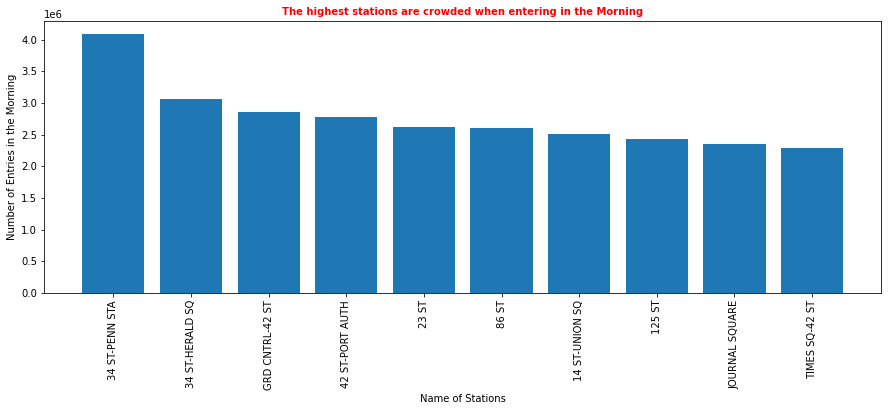

In [293]:
plt.figure(figsize=(15,5))
plt.bar(x=Most_morning_ENT['STATION'][:10], height=Most_morning_ENT['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Entries in the Morning')
plt.xlabel('Name of Stations')
plt.title('The highest stations are crowded when entering in the Morning',color='r',size=10, weight="bold")

# EXITS

In [84]:
tEXI_daily= \
(turnstiles_daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_EXITS']].sum().reset_index())
tEXI_daily.head()

,STATION,TIME_INTERVAL,DAILY_EXITS
0,1 AV,After Noon,1251939.0
1,1 AV,Evening,1250025.0
2,1 AV,Morning,1247515.0
3,103 ST,After Noon,1032557.0
4,103 ST,Evening,1036791.0


In [235]:
tEXI_daily2= (
   tEXI_daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_EXITS']].max()
                .sort_values('DAILY_EXITS', ascending=False)
                 .reset_index())
tEXI_daily2

,STATION,TIME_INTERVAL,DAILY_EXITS
0,34 ST-PENN STA,Evening,5467434.0
1,34 ST-PENN STA,After Noon,5467342.0
2,34 ST-PENN STA,Morning,5443593.0
3,GRD CNTRL-42 ST,Evening,4211830.0
4,GRD CNTRL-42 ST,After Noon,4208577.0
...,...,...,...
1132,ORCHARD BEACH,Evening,393.0
1133,ORCHARD BEACH,Morning,393.0
1134,TOMPKINSVILLE,Evening,3.0
1135,TOMPKINSVILLE,After Noon,3.0


Exits - Evening > Residential Area

In [242]:
Most_evening_EXI=tEXI_daily2[tEXI_daily2['TIME_INTERVAL'] == 'Evening'][['STATION','DAILY_EXITS']]
Most_evening

,STATION,DAILY_EXITS
0,34 ST-PENN STA,5467434.0
3,GRD CNTRL-42 ST,4211830.0
7,34 ST-HERALD SQ,4158925.0
9,14 ST-UNION SQ,3715626.0
13,86 ST,3638527.0
...,...,...
1123,BROAD CHANNEL,6223.0
1125,RIT-MANHATTAN,4568.0
1130,ST. GEORGE,1296.0
1132,ORCHARD BEACH,393.0


Text(0.5, 1.0, 'The highest stations are crowded when exits in the evening')

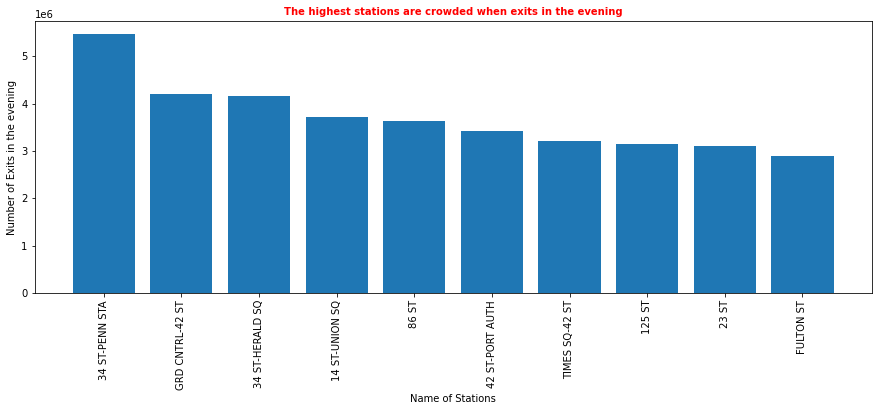

In [292]:
plt.figure(figsize=(15,5))
plt.bar(x=Most_evening_EXI['STATION'][:10], height=Most_evening_EXI['DAILY_EXITS'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Exits in the evening')
plt.xlabel('Name of Stations')
plt.title('The highest stations are crowded when exits in the evening',color='r',size=10, weight="bold")

Exits - Morning > Commercial Area

In [256]:
Most_morning_EXI=tENt_daily2[tENt_daily2['TIME_INTERVAL'] == 'Morning'][['STATION','DAILY_ENTRIES']]
Most_morning_EXI

,STATION,DAILY_ENTRIES
2,34 ST-PENN STA,4088139.0
5,34 ST-HERALD SQ,3069183.0
8,GRD CNTRL-42 ST,2860522.0
11,42 ST-PORT AUTH,2771395.0
14,23 ST,2618339.0
...,...,...
1123,BEACH 44 ST,26096.0
1127,BEACH 98 ST,20380.0
1130,BEACH 105 ST,13196.0
1133,BROAD CHANNEL,10365.0


Text(0.5, 1.0, 'The highest stations are crowded when exits in the Morning')

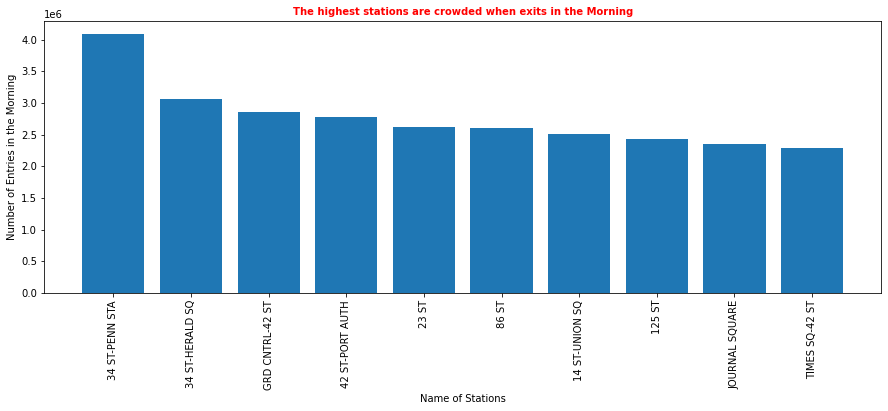

In [291]:
plt.figure(figsize=(15,5))
plt.bar(x=Most_morning_EXI['STATION'][:10], height=Most_morning_EXI['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Entries in the Morning')
plt.xlabel('Name of Stations')
plt.title('The highest stations are crowded when exits in the Morning',color='r',size=10, weight="bold")

# Traffic stations

Combian Entreis + Exits

In [79]:
turnstiles_daily['DAILY_TRAFFIC']= (turnstiles_daily['DAILY_ENTRIES'] +turnstiles_daily['DAILY_EXITS'])

In [80]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
1,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 04:00:00,2595713,7592804,Morning,06/26/2021,7592792.0,2595706.0,12.0,7.0,19.0
2,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 08:00:00,2595729,7592816,Morning,06/26/2021,7592804.0,2595713.0,12.0,16.0,28.0
4,A002,R051,02-00-00,59 ST,06/26/2021,2021-06-26 16:00:00,2595791,7592992,After Noon,06/26/2021,7592870.0,2595762.0,122.0,29.0,151.0
6,A002,R051,02-00-00,59 ST,06/27/2021,2021-06-27 00:00:00,2595818,7593175,Morning,06/26/2021,7592816.0,2595729.0,359.0,89.0,448.0
7,A002,R051,02-00-00,59 ST,06/27/2021,2021-06-27 04:00:00,2595820,7593182,Morning,06/27/2021,7593175.0,2595818.0,7.0,2.0,9.0


In [90]:
turnstiles_daily.sort_values("DAILY_TRAFFIC", ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
1672771,PTH22,R540,00-02-03,PATH NEW WTC,08/19/2021,2021-08-19 13:30:29,76,37,After Noon,08/19/2021,99614.0,90854.0,99577.0,90778.0,190355.0
1672772,PTH22,R540,00-02-03,PATH NEW WTC,08/19/2021,2021-08-19 17:42:29,144,318,Evening,08/18/2021,99609.0,90519.0,99291.0,90375.0,189666.0
1672774,PTH22,R540,00-02-03,PATH NEW WTC,08/20/2021,2021-08-20 02:06:29,221,570,Morning,08/19/2021,99612.0,90549.0,99042.0,90328.0,189370.0
2610330,R621,R060,00-06-00,EASTN PKWY-MUSM,08/26/2021,2021-08-26 12:00:00,55,44,After Noon,08/24/2021,82663.0,87993.0,82619.0,87938.0,170557.0
2610332,R621,R060,00-06-00,EASTN PKWY-MUSM,08/27/2021,2021-08-27 00:00:00,249,202,Morning,08/25/2021,82737.0,88115.0,82535.0,87866.0,170401.0


In [91]:
tTRAF_daily= \
(turnstiles_daily.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].sum()
                 .reset_index())
tTRAF_daily.head(7)

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,1 AV,After Noon,06/26/2021,5276.0
1,1 AV,After Noon,06/27/2021,20660.0
2,1 AV,After Noon,06/28/2021,19569.0
3,1 AV,After Noon,06/29/2021,19648.0
4,1 AV,After Noon,06/30/2021,20598.0
5,1 AV,After Noon,07/01/2021,20850.0
6,1 AV,After Noon,07/02/2021,21765.0


In [141]:
tTRAF_daily2= (
    tTRAF_daily.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].max()
                .sort_values('DAILY_TRAFFIC', ascending=False)
                 .reset_index())
tTRAF_daily2.head(5)

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,FLUSHING-MAIN,Morning,09/04/2021,317225.0
1,GROVE STREET,After Noon,07/01/2021,290495.0
2,PAVONIA/NEWPORT,Morning,07/14/2021,274931.0
3,LACKAWANNA,After Noon,09/01/2021,269570.0
4,PATH NEW WTC,After Noon,08/19/2021,267188.0


Traffic stations in Commerical Area

In [262]:
Most_AfterNoon_tra=tTRAF_daily2[tTRAF_daily2['TIME_INTERVAL'] == 'After Noon'][['STATION','DAILY_TRAFFIC']]
Most_AfterNoon_tra

,STATION,DAILY_TRAFFIC
1,GROVE STREET,290495.0
3,LACKAWANNA,269570.0
4,PATH NEW WTC,267188.0
8,JOURNAL SQUARE,239617.0
9,JOURNAL SQUARE,235758.0
...,...,...
102871,CYPRESS HILLS,0.0
102872,85 ST-FOREST PK,0.0
102873,85 ST-FOREST PK,0.0
102879,ORCHARD BEACH,0.0


Text(0.5, 1.0, 'The highest stations are crowded when Traffic in the After Noon')

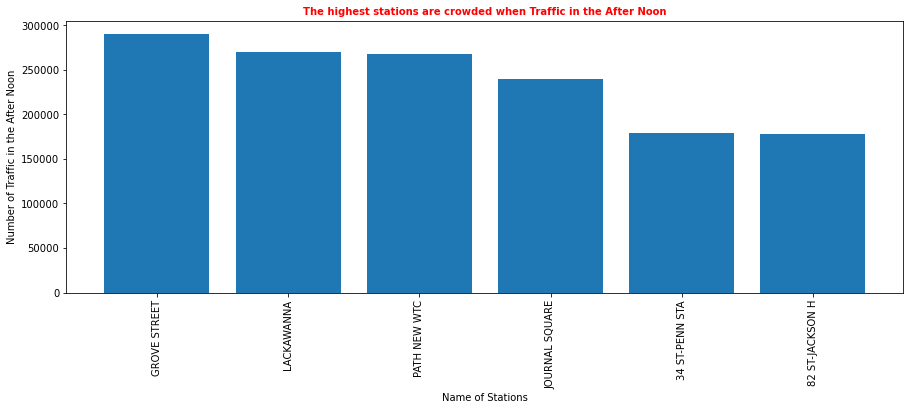

In [295]:
plt.figure(figsize=(15,5))
plt.bar(x=Most_AfterNoon_tra['STATION'][:10], height=Most_AfterNoon_tra['DAILY_TRAFFIC'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Traffic in the After Noon')
plt.xlabel('Name of Stations')
plt.title('The highest stations are crowded when Traffic in the After Noon',color='r',size=10, weight="bold")

# Top10 crow stations

In [142]:
top5_stations = (turnstiles_daily.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   .STATION.head(10))

In [167]:
top5_stations.head(10)

61      34 ST-PENN STA
59     34 ST-HERALD SQ
233    GRD CNTRL-42 ST
110              86 ST
14      14 ST-UNION SQ
68     42 ST-PORT AUTH
46               23 ST
9               125 ST
353     TIMES SQ-42 ST
226          FULTON ST
Name: STATION, dtype: object

In [144]:
station_totals = turnstiles_daily.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,EXITS,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,34 ST-PENN STA,2796876452471,2526370766586,2.526726e+12,2.796873e+12,12296567.0,16378369.0,28674936.0
1,34 ST-HERALD SQ,2115208935620,1722258137569,1.722250e+12,2.115196e+12,9228671.0,12470090.0,21698761.0
2,GRD CNTRL-42 ST,1013832560014,1163968405199,1.163960e+12,1.013820e+12,8612852.0,12604275.0,21217127.0
3,86 ST,226131204918,204145900248,2.068678e+11,2.317526e+11,7825979.0,10907340.0,18733319.0
4,14 ST-UNION SQ,106294192448,147777839050,1.477761e+11,1.062857e+11,7572561.0,11114189.0,18686750.0


 matplotlib graphs for to 10 stations

Text(0.5, 1.0, 'Top 10 crowded stations')

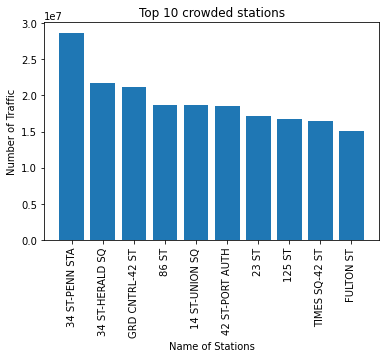

In [147]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_TRAFFIC'][:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Traffic')
plt.xlabel('Name of Stations')
plt.title('Top 10 crowded stations')

 matplotlib graphs for to 10 stations

Text(0.5, 1.0, 'Top 5 crowded stations')

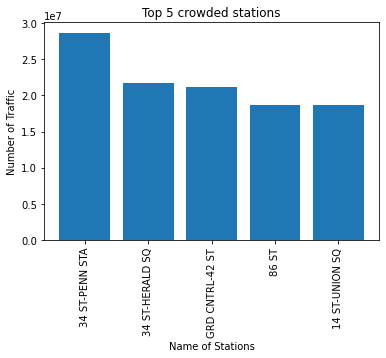

In [148]:
plt.bar(x=station_totals['STATION'][:5], height=station_totals['DAILY_TRAFFIC'][:5])
plt.xticks(rotation=90)
plt.ylabel('Number of Traffic')
plt.xlabel('Name of Stations')
plt.title('Top 5 crowded stations')

# TOP1 Station Name: '34 ST-PENN STA' 

In [157]:
station_daily_34_ST_PENN_STA=tTRAF_daily2[tTRAF_daily2['STATION'] == '34 ST-PENN STA']
station_daily_34_ST_PENN_STA

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
16,34 ST-PENN STA,Evening,09/21/2021,180739.0
17,34 ST-PENN STA,Morning,09/15/2021,179011.0
18,34 ST-PENN STA,Evening,09/14/2021,178523.0
19,34 ST-PENN STA,After Noon,09/15/2021,178522.0
21,34 ST-PENN STA,After Noon,09/21/2021,177370.0
...,...,...,...,...
3657,34 ST-PENN STA,Evening,08/22/2021,46806.0
3934,34 ST-PENN STA,Morning,08/23/2021,45019.0
10303,34 ST-PENN STA,After Noon,06/26/2021,23573.0
49446,34 ST-PENN STA,Morning,06/26/2021,6357.0


Text(0.5, 1.0, 'Daily traffic for Turnstile 34 ST-PENN STA')

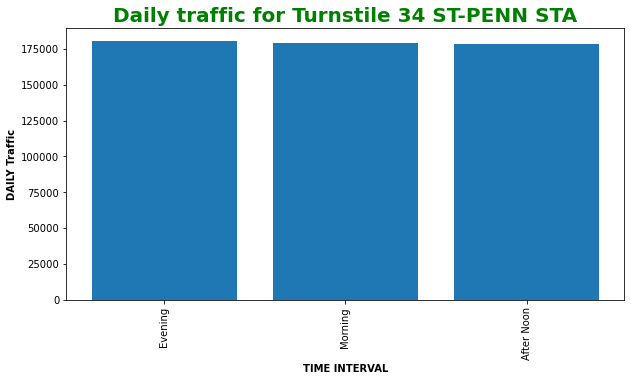

In [161]:

plt.figure(figsize=(10,5))
plt.bar(x=station_daily_34_ST_PENN_STA['TIME_INTERVAL'],height=station_daily_34_ST_PENN_STA['DAILY_TRAFFIC'])
plt.ylabel("DAILY Traffic",size=10, weight="bold")
plt.xlabel("TIME INTERVAL", size=10, weight="bold")
plt.xticks(rotation=90 )
plt.title('Daily traffic for Turnstile 34 ST-PENN STA', color='g',size=20, weight="bold")


# TOP2 Station Name: '34 ST-HERALD SQ'

In [155]:
station_daily_34_ST_HERALD_SQ=tTRAF_daily2[tTRAF_daily2['STATION'] == '34 ST-HERALD SQ']
station_daily_34_ST_HERALD_SQ

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
161,34 ST-HERALD SQ,Evening,07/12/2021,115726.0
323,34 ST-HERALD SQ,Morning,09/11/2021,99847.0
327,34 ST-HERALD SQ,Evening,09/10/2021,99053.0
335,34 ST-HERALD SQ,Morning,09/18/2021,98284.0
338,34 ST-HERALD SQ,Evening,09/24/2021,98180.0
...,...,...,...,...
5683,34 ST-HERALD SQ,Evening,08/22/2021,34331.0
6471,34 ST-HERALD SQ,Morning,08/23/2021,31539.0
12757,34 ST-HERALD SQ,Evening,07/11/2021,20335.0
13008,34 ST-HERALD SQ,After Noon,06/26/2021,20035.0


Text(0.5, 1.0, 'Daily traffic for Turnstile 34 ST-HERALD SQ')

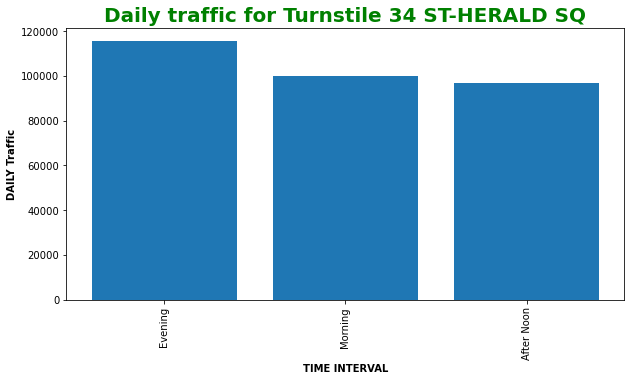

In [156]:

plt.figure(figsize=(10,5))
plt.bar(x=station_daily_34_ST_HERALD_SQ['TIME_INTERVAL'],height=station_daily_34_ST_HERALD_SQ['DAILY_TRAFFIC'])
plt.ylabel("DAILY Traffic",size=10, weight="bold")
plt.xlabel("TIME INTERVAL", size=10, weight="bold")
plt.xticks(rotation=90 )
plt.title('Daily traffic for Turnstile 34 ST-HERALD SQ', color='g',size=20, weight="bold")


# TOP3 Station Name: 'GRD CNTRL-42 ST'

In [159]:
station_daily_GRD_CNTRL_42_ST=tTRAF_daily2[tTRAF_daily2['STATION'] == 'GRD CNTRL-42 ST']
station_daily_GRD_CNTRL_42_ST

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
61,GRD CNTRL-42 ST,Evening,08/19/2021,131139.0
218,GRD CNTRL-42 ST,Evening,09/23/2021,112139.0
228,GRD CNTRL-42 ST,Evening,09/22/2021,111220.0
229,GRD CNTRL-42 ST,After Noon,09/22/2021,111207.0
232,GRD CNTRL-42 ST,Morning,09/23/2021,111013.0
...,...,...,...,...
9567,GRD CNTRL-42 ST,Morning,08/23/2021,24727.0
9570,GRD CNTRL-42 ST,Evening,08/22/2021,24717.0
20177,GRD CNTRL-42 ST,After Noon,06/26/2021,14319.0
58559,GRD CNTRL-42 ST,Evening,06/26/2021,5094.0


Text(0.5, 1.0, 'Daily traffic for Turnstile GRD CNTRL-42 ST')

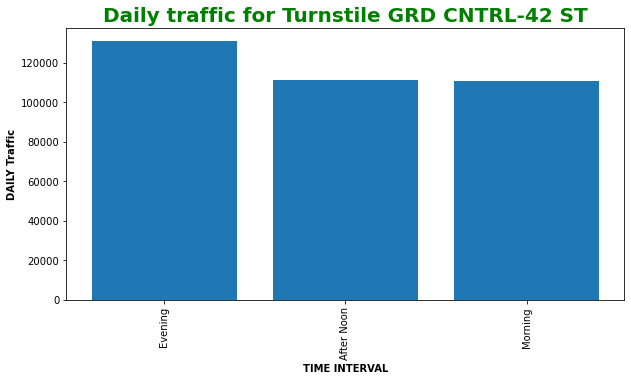

In [162]:
plt.figure(figsize=(10,5))
plt.bar(x=station_daily_GRD_CNTRL_42_ST['TIME_INTERVAL'],height=station_daily_GRD_CNTRL_42_ST['DAILY_TRAFFIC'])
plt.ylabel("DAILY Traffic",size=10, weight="bold")
plt.xlabel("TIME INTERVAL", size=10, weight="bold")
plt.xticks(rotation=90 )
plt.title('Daily traffic for Turnstile GRD CNTRL-42 ST', color='g',size=20, weight="bold")


# TOP4 Station Name: '86 ST'

In [163]:
station_daily_86_ST =tTRAF_daily2[tTRAF_daily2['STATION'] == '86 ST']
station_daily_86_ST.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
324,86 ST,Evening,09/23/2021,99804.0
326,86 ST,After Noon,09/23/2021,99178.0
365,86 ST,Morning,09/24/2021,97061.0
375,86 ST,Morning,09/15/2021,96601.0
382,86 ST,After Noon,09/14/2021,96199.0


Text(0.5, 1.0, 'Daily traffic for Turnstile 86 ST')

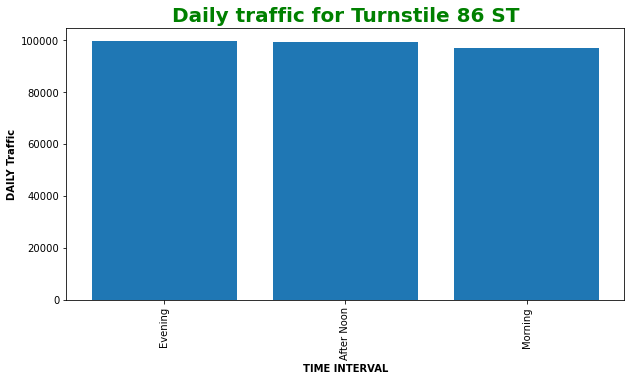

In [165]:
plt.figure(figsize=(10,5))
plt.bar(x=station_daily_86_ST['TIME_INTERVAL'],height=station_daily_86_ST['DAILY_TRAFFIC'])
plt.ylabel("DAILY Traffic",size=10, weight="bold")
plt.xlabel("TIME INTERVAL", size=10, weight="bold")
plt.xticks(rotation=90 )
plt.title('Daily traffic for Turnstile 86 ST', color='g',size=20, weight="bold")


# TOP5 Station Name: '14 ST-UNION SQ'

In [259]:
station_daily_14_ST_UNION_SQ=tTRAF_daily2[tTRAF_daily2['STATION'] == '14 ST-UNION SQ']
station_daily_14_ST_UNION_SQ.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
216,14 ST-UNION SQ,Evening,09/13/2021,112336.0
243,14 ST-UNION SQ,Morning,09/14/2021,110308.0
368,14 ST-UNION SQ,Morning,09/18/2021,97002.0
369,14 ST-UNION SQ,Evening,09/24/2021,96882.0
404,14 ST-UNION SQ,Morning,09/23/2021,95436.0


Text(0.5, 1.0, 'Daily traffic for Turnstile 14 ST-UNION SQ')

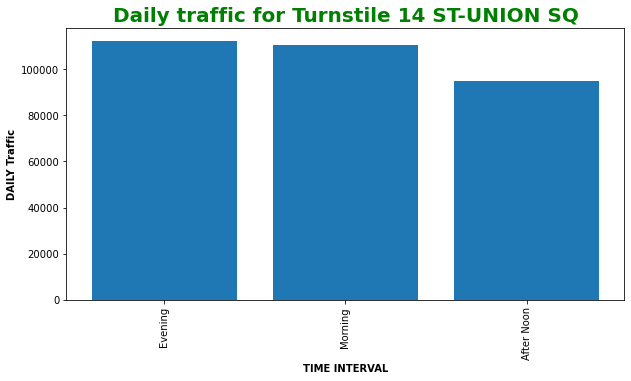

In [260]:
plt.figure(figsize=(10,5))
plt.bar(x=station_daily_14_ST_UNION_SQ['TIME_INTERVAL'],height=station_daily_14_ST_UNION_SQ['DAILY_TRAFFIC'])
plt.ylabel("DAILY Traffic",size=10, weight="bold")
plt.xlabel("TIME INTERVAL", size=10, weight="bold")
plt.xticks(rotation=90 )
plt.title('Daily traffic for Turnstile 14 ST-UNION SQ', color='g',size=20, weight="bold")
